In [1]:
import matplotlib.pyplot as plt
import pandas as pd

        Wall time   Step     Value
0    1.695188e+09    0.0 -4.652243
1    1.695188e+09    1.0 -1.501263
2    1.695188e+09    2.0 -3.517777
3    1.695188e+09    3.0 -0.729572
4    1.695188e+09    4.0 -0.979090
..            ...    ...       ...
602  1.695200e+09  602.0 -0.014547
603  1.695200e+09  603.0 -0.016797
604  1.695200e+09  604.0 -0.016811
605  1.695200e+09  605.0 -0.026452
606  1.695200e+09  606.0 -0.018772

[607 rows x 3 columns]


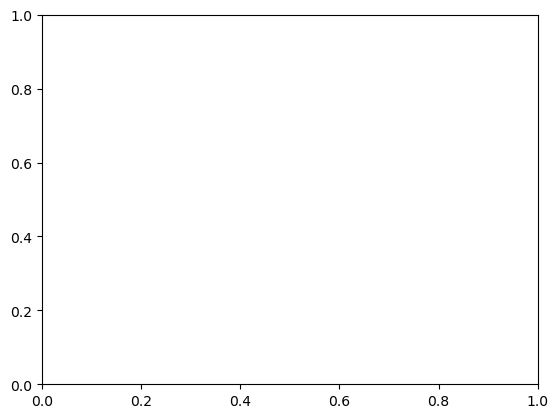

In [2]:
df = pd.read_csv("data/ppo_log_1695187537.csv")
df = pd.DataFrame(df)
ax = plt.gca()
df_groupby = df.groupby(df.index)
data_avg = df_groupby.mean()
print(data_avg)

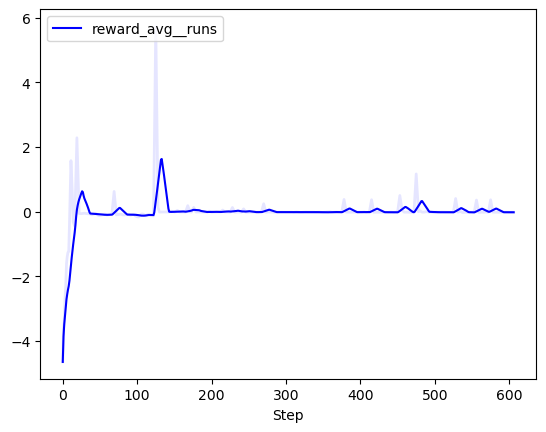

In [3]:
df = pd.read_csv("data/ppo_log_1695187537.csv")
df = pd.DataFrame(df)
ax = plt.gca()
df_groupby = df.groupby(df.index)
data_avg = df_groupby.mean()
data_avg['reward_smooth'] = data_avg['Value'].rolling(window=20, win_type='triang', min_periods=1).mean()
data_avg['reward_var'] = data_avg['Value'].rolling(window=5, win_type='triang', min_periods=1).mean()

data_avg.plot(kind='line', x='Step' , y='reward_smooth',ax=ax,color='blue',  linewidth=1.5, alpha=1)
data_avg.plot(kind='line', x='Step' , y='reward_var',ax=ax,color='blue',  linewidth=2, alpha=0.1)

# keep only reward_smooth in the legend and rename it
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[0]], ["reward_avg_"  + "_runs"], loc=2)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


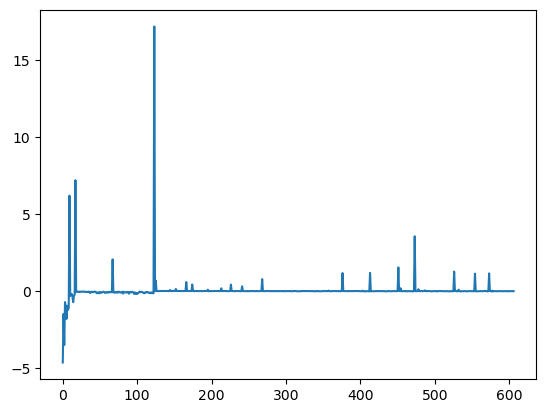

In [4]:
plt.plot(df.Step, df.Value)
plt.show()